# dataset plot with zoom insets

In [1]:
import sys
sys.path.append('..')
import os
import random
import numpy as np
import unidecode
import numpy.ma as ma
import pylab as pl
import skimage
import agronn.classif2 as classif2
import matplotlib.cm as cm
import skimage.color as skcolor
import sklearn.cross_validation as skcross
import scipy.stats as stats
from osgeo import gdal
from osgeo import ogr
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


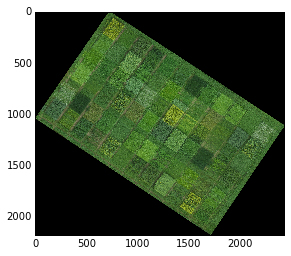

In [2]:
img_rgb = classif2.load_image('2013_10_08', 'rgb')
img_rgb = skimage.img_as_float(img_rgb).astype(np.float32)
pl.imshow(img_rgb)

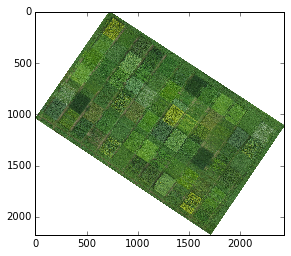

In [3]:
# white background
vimg = img_rgb.copy()
vimg[np.all(img_rgb == 0, axis=2)] = 1
pl.imshow(vimg)

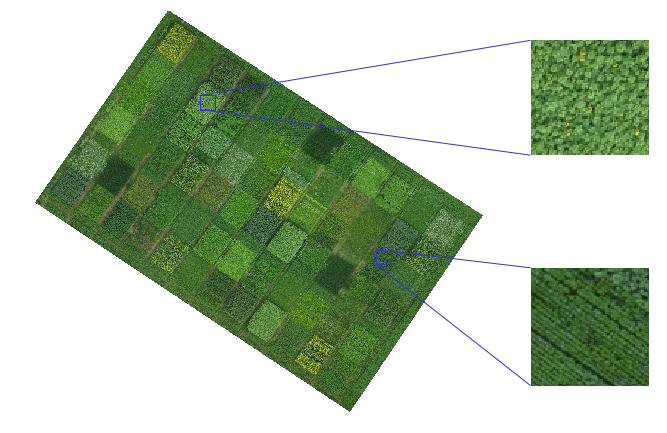

In [5]:
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

fig, ax = pl.subplots(figsize=([8, 8]))
ax.imshow(vimg, interpolation='nearest')
ax.axis('off')

#axins1 = zoomed_inset_axes(ax, 8, loc=1) # zoom = 6
axins1 = zoomed_inset_axes(
    ax, 8, loc=4,
    bbox_to_anchor=(1.2, 0.6),
    bbox_transform=ax.figure.transFigure) # zoom = 6
axins1.imshow(vimg, interpolation='nearest')
axins1.set_xlim(897, 977)
axins1.set_ylim(533, 455)
axins1.axis('off')

# https://ocefpaf.github.io/python4oceanographers/blog/2013/12/09/zoom/
#axins2 = zoomed_inset_axes(ax, 8, loc=4) # zoom = 6
axins2 = zoomed_inset_axes(
    ax, 8, loc=4,
    bbox_to_anchor=(1.2, 0.2),
    bbox_transform=ax.figure.transFigure) # zoom = 6
axins2.imshow(vimg, interpolation='nearest')
axins2.set_xlim(1850, 1930)
axins2.set_ylim(1373, 1293)
axins2.axis('off')

mark_inset(ax, axins1, loc1=2, loc2=3, fc="none", ec=(0.2,0.2,0.8))
mark_inset(ax, axins2, loc1=2, loc2=3, fc="none", ec=(0.2,0.2,0.8))

pl.savefig('../../latex/figs/dataset_with_zoom.pdf', bbox_inches='tight', dpi=150)